In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib as mpl
from tqdm import tqdm
from functools import cache
from part1 import Euro_call
import time
mpl.rcParams["figure.dpi"] = 240
mpl.rcParams["figure.figsize"] = (10,6)

In [2]:
price_model = Euro_call(100,100,0.05,0.4,1)

In [3]:
print(dir(price_model))

['Monte_Carlo_delta', 'Monte_Carlo_gamma', 'Monte_Carlo_price', 'Monte_Carlo_vega', 'T', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_stock_price', 'delta', 'df', 'gamma', 'likelihood_delta', 'likelihood_gamma', 'likelihood_vega', 'lr_pw_gamma', 'pathwise_delta', 'pathwise_vega', 'price', 'pw_lr_gamma', 'r', 'rng', 'sigma', 'spot', 'stock_price', 'strike_price', 'vega']


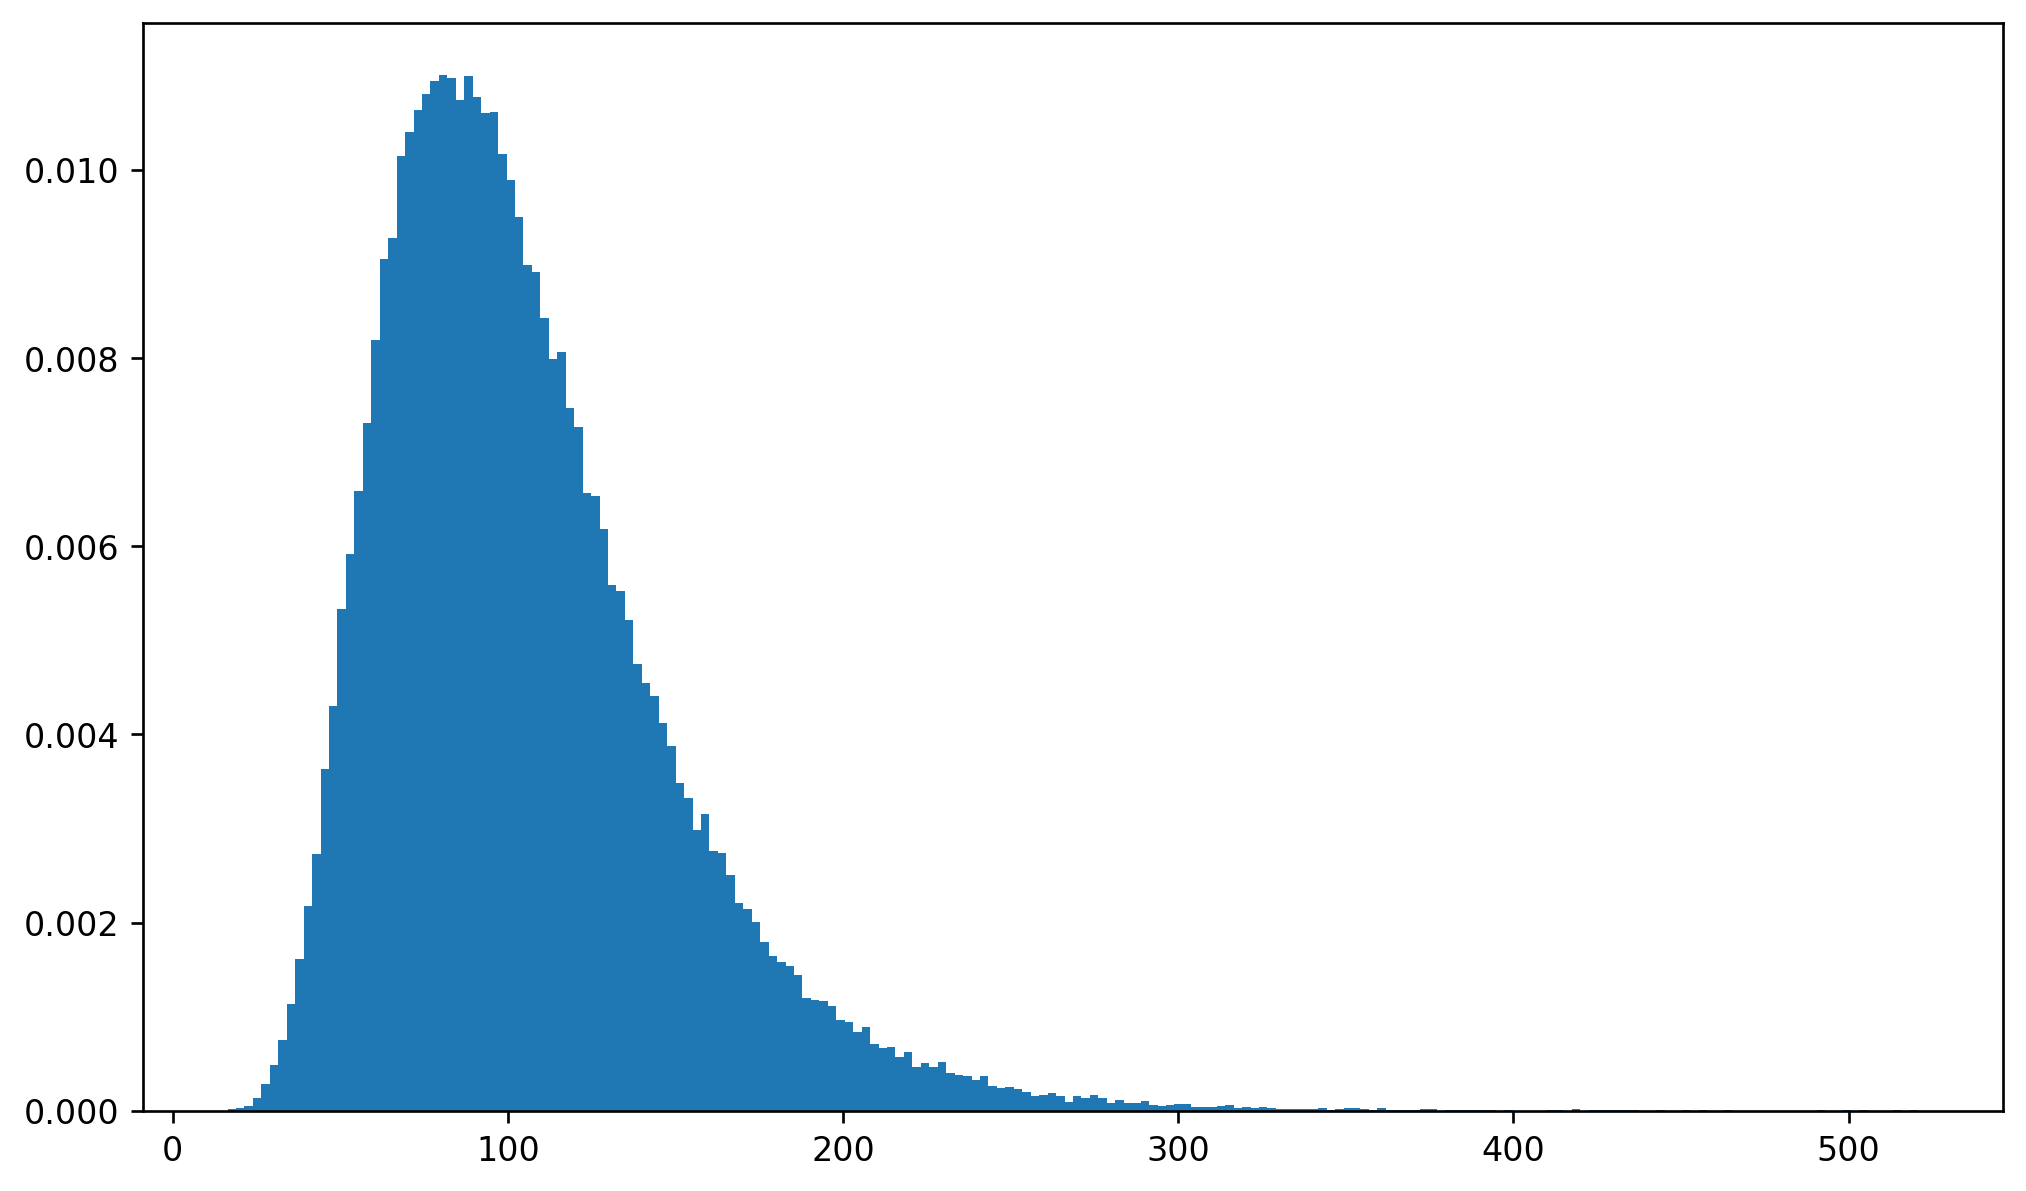

In [4]:
plt.hist(price_model.stock_price(100000),bins = 200,density = True)
plt.show()

In [5]:
A,B,C,D = [],[],[],[]
for N in tqdm(x:=range(1000,150000,500)):
    A.append(price_model.Monte_Carlo_price(N))
    B.append(price_model.Monte_Carlo_price(N,antithetic_variates = True))
    C.append(price_model.Monte_Carlo_price(N,control_variates = True))
    D.append(price_model.Monte_Carlo_price(N,antithetic_variates = True,control_variates = True))

100%|████████████████████████████████████████████████████████████████████████████████| 298/298 [00:03<00:00, 79.43it/s]


In [6]:
VA,VB,VC,VD = [],[],[],[]
for _ in tqdm(range(1000)):
    VA.append(price_model.Monte_Carlo_price(100000))
    VB.append(price_model.Monte_Carlo_price(100000,antithetic_variates = True))
    VC.append(price_model.Monte_Carlo_price(100000,control_variates = True))
    VD.append(price_model.Monte_Carlo_price(N,antithetic_variates = True,control_variates = True))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.67it/s]


In [7]:
print("The variance of the Monte Carlo estimator for euro call price is:",round(np.var(VA),6))
print("The variance of the antithetic variates estimator for euro call price is:",round(np.var(VB),6))
print("The variance of the control variates estimator for euro call price is:",round(np.var(VC),6))
print("The variance of the composite estimator for euro call price is:",round(np.var(VD),6))

The variance of the Monte Carlo estimator for euro call price is: 0.009579
The variance of the antithetic variates estimator for euro call price is: 0.00312
The variance of the control variates estimator for euro call price is: 0.001275
The variance of the composite estimator for euro call price is: 0.002327


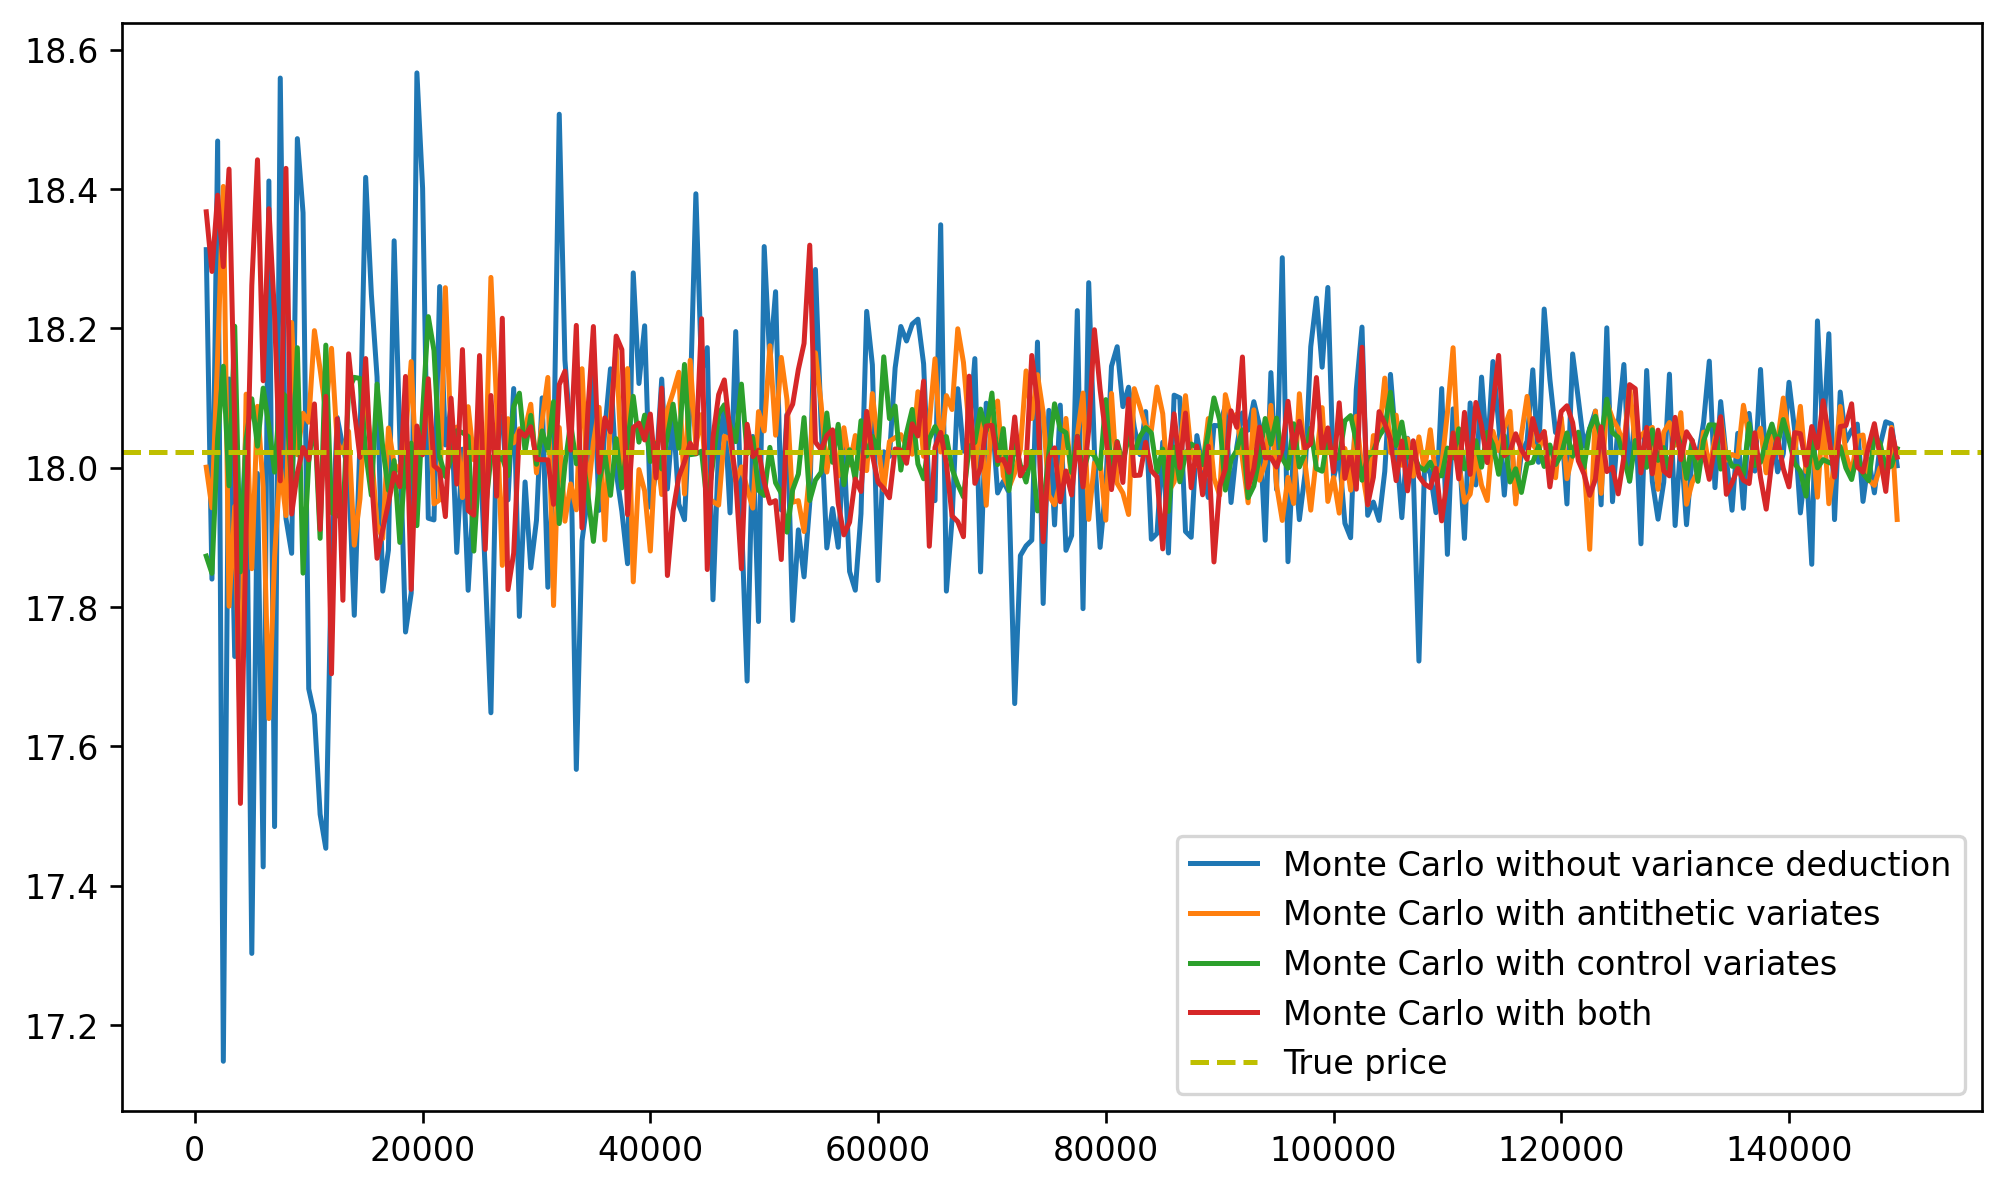

In [8]:
plt.plot(x,A,label = "Monte Carlo without variance deduction")
plt.plot(x,B,label = "Monte Carlo with antithetic variates")
plt.plot(x,C,label = "Monte Carlo with control variates")
plt.plot(x,D,label = "Monte Carlo with both")
plt.axhline(price_model.price,color = "y",linestyle = '--',label = "True price")
plt.legend()

100%|███████████████████████████████████████████████████████████████████████████████| 298/298 [00:01<00:00, 160.50it/s]


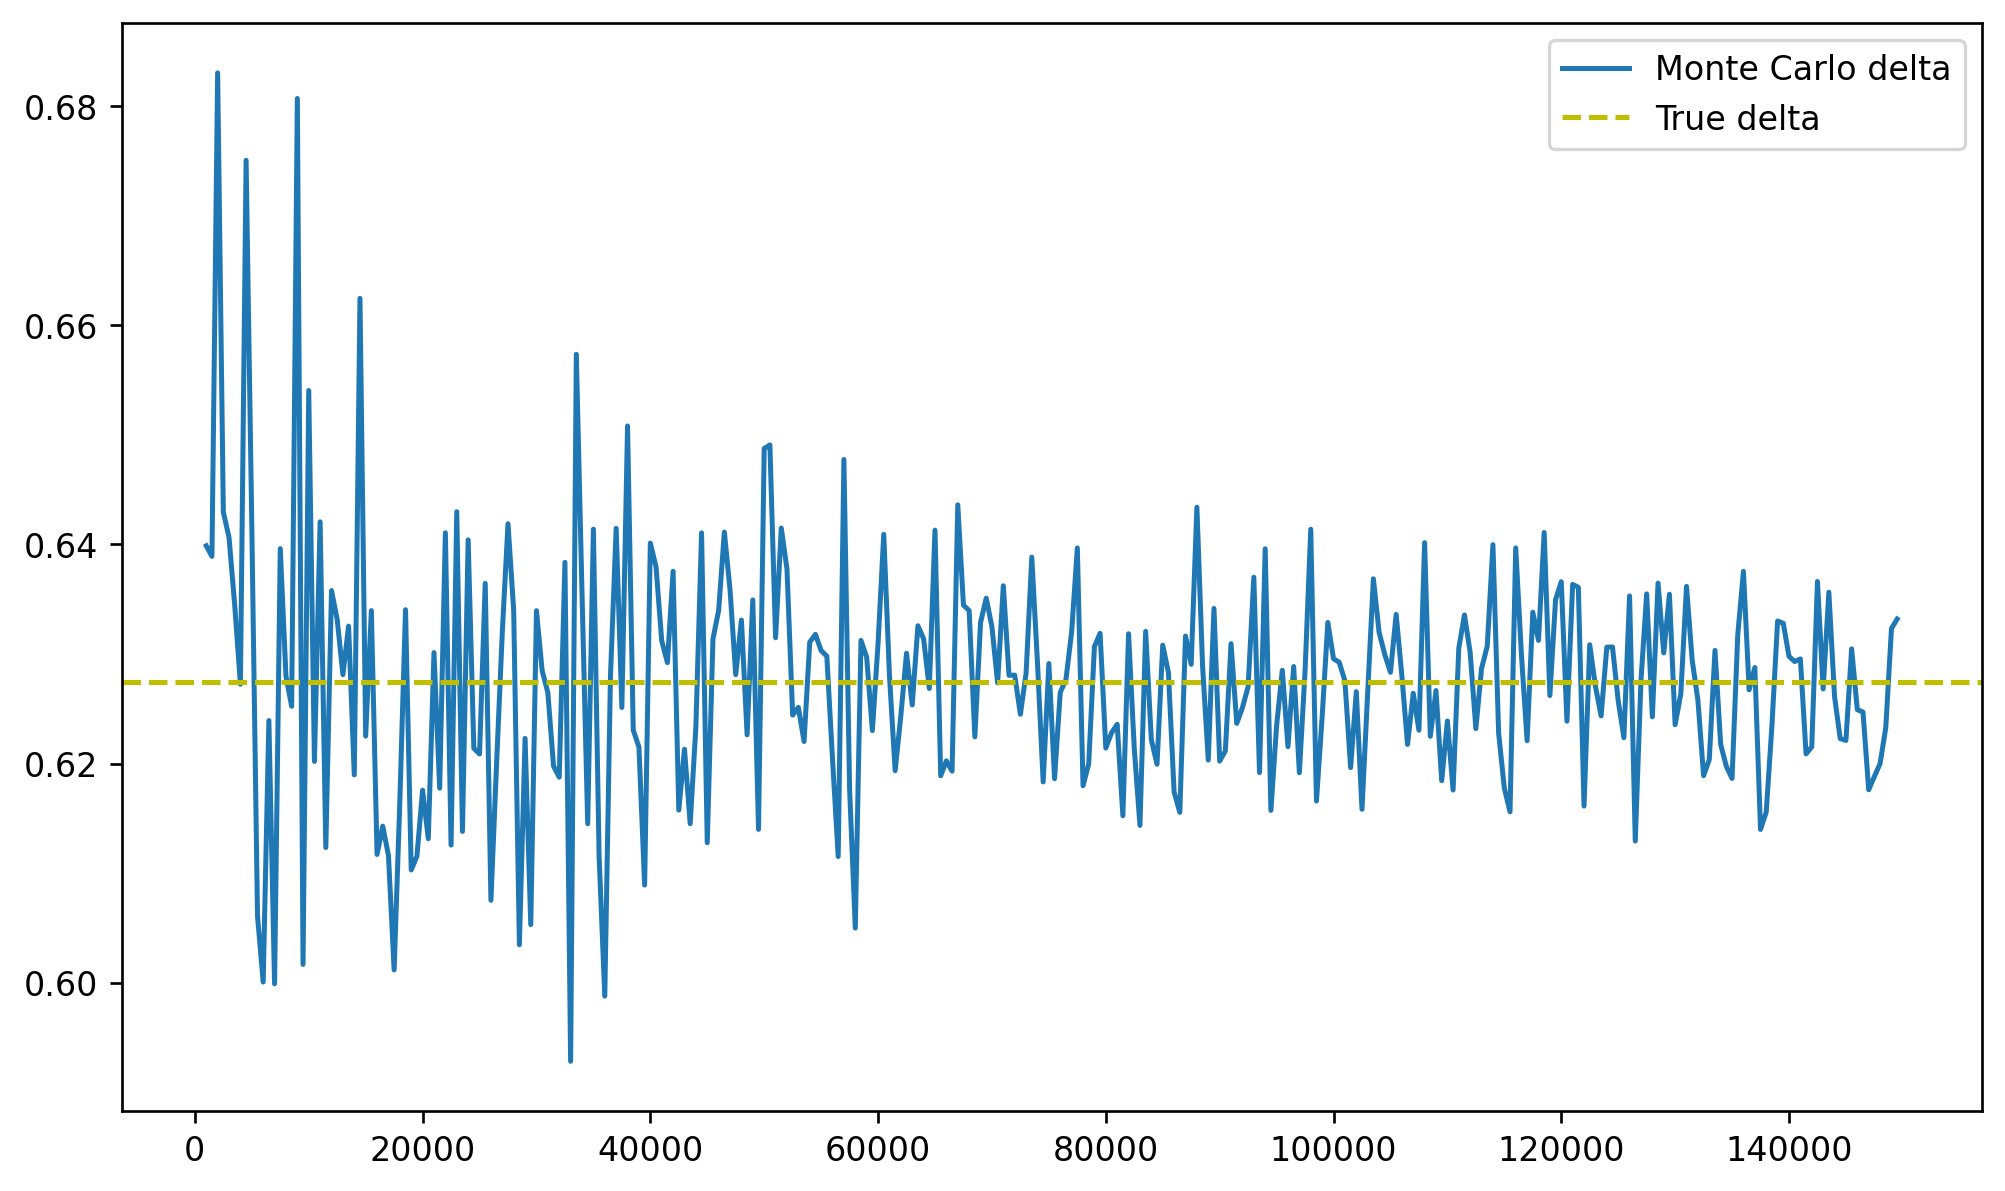

In [9]:
delta = []
for N in tqdm(x:=range(1000,150000,500)):
    delta.append(price_model.Monte_Carlo_delta(N))
plt.plot(x,delta,label = "Monte Carlo delta")
plt.axhline(price_model.delta,color = "y",linestyle = '--',label = "True delta")
plt.legend()

In [10]:
var_delta = []
for seed in tqdm(range(30)):
    var_delta.append(price_model.Monte_Carlo_delta(1000000))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.51it/s]


In [11]:
print(np.std(var_delta))

0.0020558347110215557


In [12]:
price_model.Monte_Carlo_delta(1000000)-price_model.delta

-0.0029537202310263577

In [13]:
price_model.delta

0.627409464153284

100%|███████████████████████████████████████████████████████████████████████████████| 298/298 [00:01<00:00, 161.97it/s]


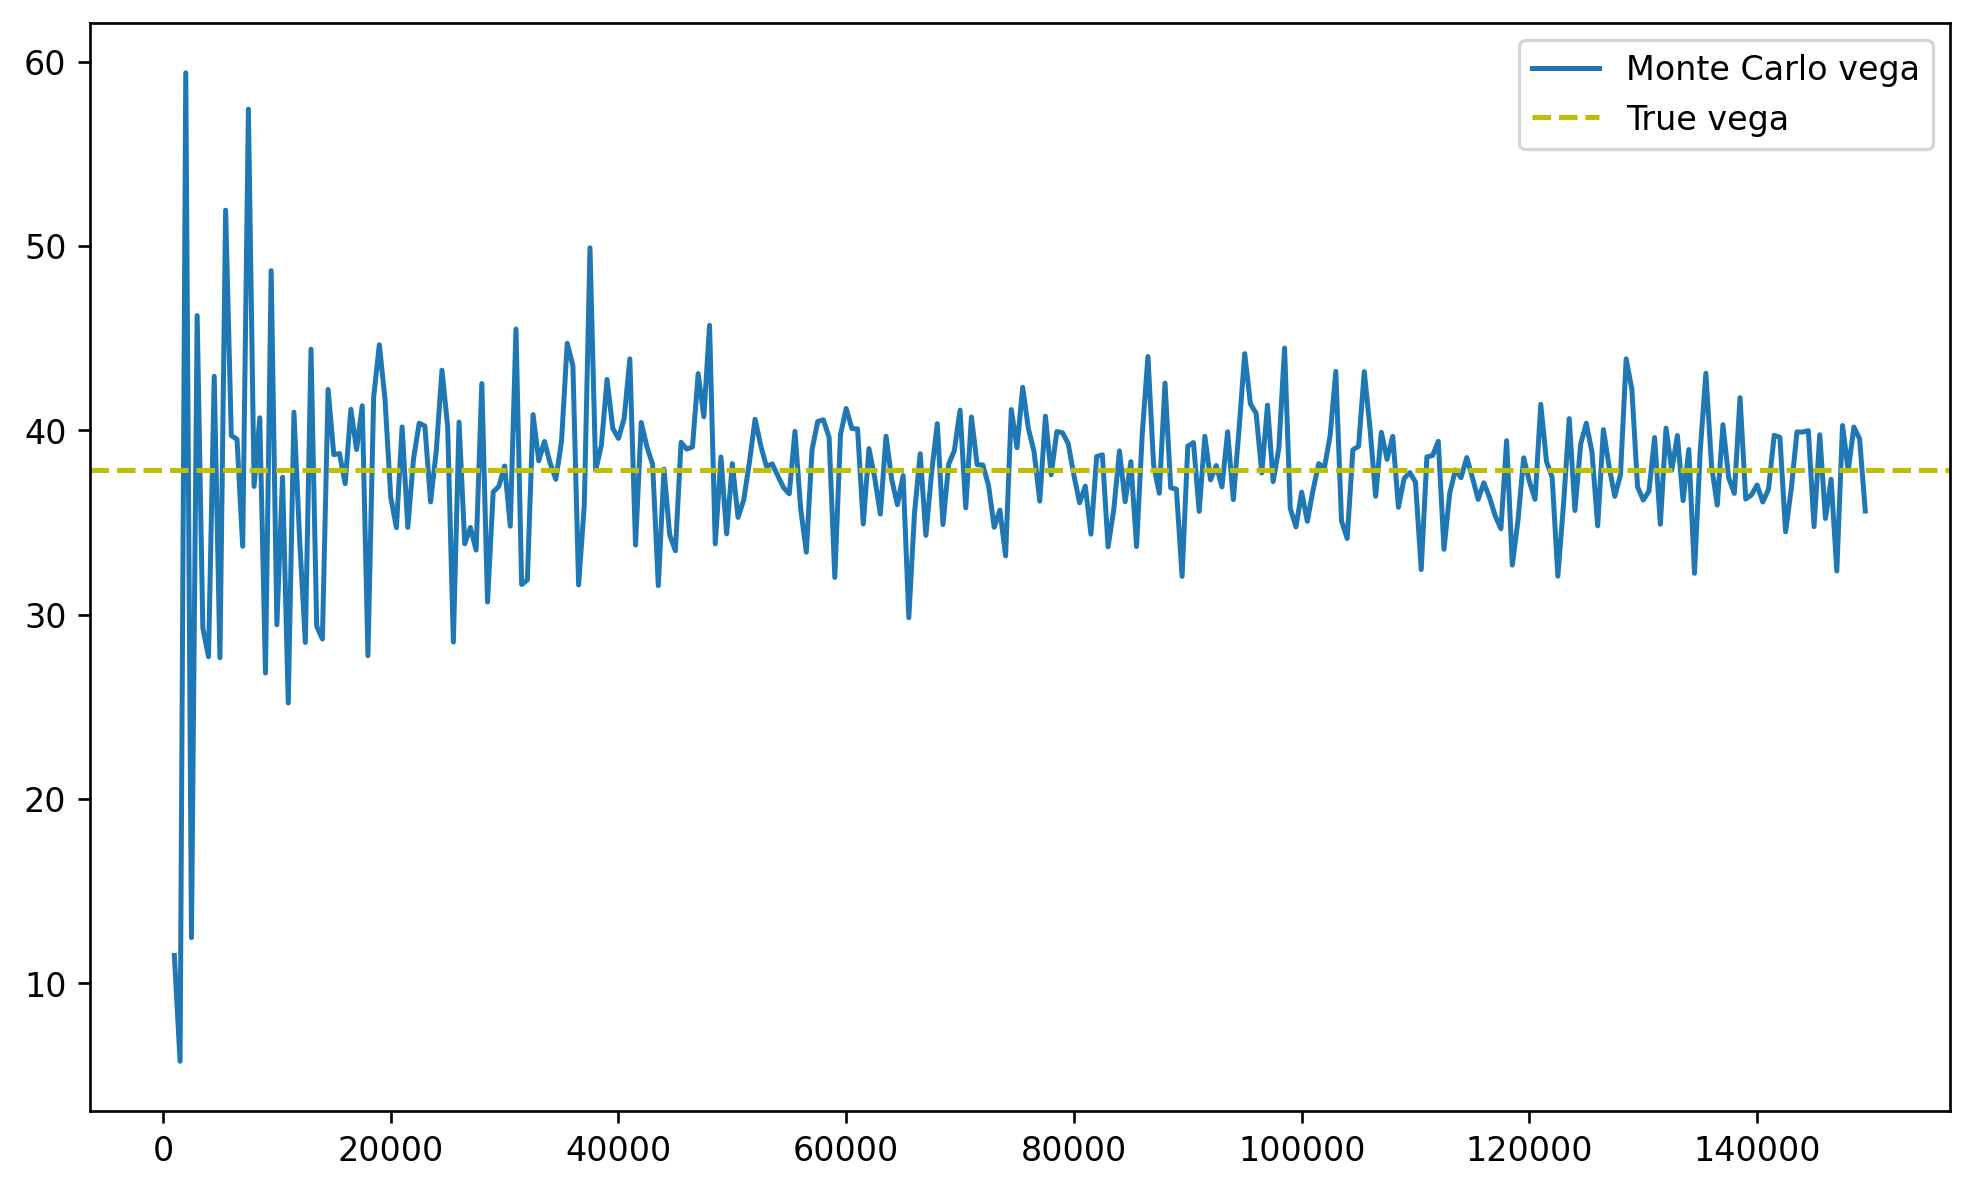

In [14]:
vega = []
for N in tqdm(x:=range(1000,150000,500)):
    vega.append(price_model.Monte_Carlo_vega(N))
plt.plot(x,vega,label = "Monte Carlo vega")
plt.axhline(price_model.vega,color = "y",linestyle = '--',label = "True vega")
plt.legend()

In [15]:
(price_model.pathwise_vega(1000000)-price_model.vega)*0.01

-0.0002523112388479376

In [16]:
price_model.pathwise_delta(1000000)-price_model.delta

-0.0009999008272041365

In [17]:
price_model.likelihood_delta(1000000)-price_model.delta

-0.000750032713985993

In [18]:
price_model.likelihood_vega(1000000)-price_model.vega

0.4167305300123445

In [19]:
price_model.likelihood_gamma(1000000)-price_model.gamma

0.0001662529420663264

In [20]:
price_model.lr_pw_gamma(1000000)-price_model.gamma

2.0630069040001794e-05

In [21]:
price_model.pw_lr_gamma(1000000)-price_model.gamma

-7.285599940315413e-06